# Programación para la Ciencia de Datos

## Encuentro Final

#### Importando el Dataset

In [5]:
#importar la libreria de Pandas
import pandas as pd

In [7]:
#Cargar los dataset de nuestro Csv
business_df=pd.read_csv('business.csv')
economy_df=pd.read_csv('economy.csv')

In [8]:
#importar libreria para visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#analisis basico de las variables
print(business_df.info())
print(economy_df.info())
print(business_df.describe())
print(economy_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object

In [13]:
#Generamos una funcion para una limpieza de datos que nos funcione para ambos dataframes

def limpiar_datos(df):
    df.columns = df.columns.str.strip()
    df = df.drop_duplicates()
    df = df.fillna('')
    # Convertir las cadenas de texto en las columnas a minúsculas
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.lower()

    # Eliminar caracteres especiales de las columnas tipo string
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.replace(r'[^\w\s]', '', regex=True)

    # Eliminar espacios en blanco adicionales en las columnas tipo string
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.strip()

    return df

In [15]:
# Aplicar la función de limpieza a ambos DataFrames
business_df = limpiar_datos(business_df)
economy_df = limpiar_datos(economy_df)

In [16]:
#listar economy
economy_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11022022,spicejet,sg,8709,1855,delhi,02h 10m,nonstop,2105,mumbai,5953
1,11022022,spicejet,sg,8157,0620,delhi,02h 20m,nonstop,0840,mumbai,5953
2,11022022,airasia,i5,764,0425,delhi,02h 10m,nonstop,0635,mumbai,5956
3,11022022,vistara,uk,995,1020,delhi,02h 15m,nonstop,1235,mumbai,5955
4,11022022,vistara,uk,963,0850,delhi,02h 20m,nonstop,1110,mumbai,5955


In [19]:
#listar business
business_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11022022,air india,ai,868,1800,delhi,02h 00m,nonstop,2000,mumbai,25612
1,11022022,air india,ai,624,1900,delhi,02h 15m,nonstop,2115,mumbai,25612
2,11022022,air india,ai,531,2000,delhi,24h 45m,1stop,2045,mumbai,42220
3,11022022,air india,ai,839,2125,delhi,26h 30m,1stop,2355,mumbai,44450
4,11022022,air india,ai,544,1715,delhi,06h 40m,1stop,2355,mumbai,46690


In [21]:
# Concatenar los DataFrames
flights_df = pd.concat([business_df, economy_df], ignore_index=True)

In [23]:
# Identificar aerolíneas comunes en ambos DataFrames
common_airlines = set(business_df['airline']).intersection(set(economy_df['airline']))

In [25]:
# Listar las aerolíneas comunes
print("Aerolíneas presentes en ambos DataFrames:")
for airline in common_airlines:
    print(airline)

Aerolíneas presentes en ambos DataFrames:
air india
vistara


In [55]:
#Agregar la columna category a cada DataFrame:
business_df['category'] = 'Business'
economy_df['category'] = 'Economy'

In [79]:
#concatenar luego de agregar la columna
flights_df = pd.concat([business_df, economy_df], ignore_index=True)

In [81]:
# Convertir la columna 'price' a numérica (si es necesario)
flights_df['price'] = pd.to_numeric(flights_df['price'], errors='coerce')

In [83]:
#hacer el cambio del tipo de variable
flights_df['price'] = flights_df['price'].astype(float)

In [85]:
# Verificar si la columna 'category' se agregó correctamente
print(flights_df.head())

       date    airline ch_code  num_code dep_time   from time_taken     stop  \
0  11022022  air india      ai       868     1800  delhi    02h 00m  nonstop   
1  11022022  air india      ai       624     1900  delhi    02h 15m  nonstop   
2  11022022  air india      ai       531     2000  delhi    24h 45m    1stop   
3  11022022  air india      ai       839     2125  delhi    26h 30m    1stop   
4  11022022  air india      ai       544     1715  delhi    06h 40m    1stop   

  arr_time      to    price  category  
0     2000  mumbai  25612.0  Business  
1     2115  mumbai  25612.0  Business  
2     2045  mumbai  42220.0  Business  
3     2355  mumbai  44450.0  Business  
4     2355  mumbai  46690.0  Business  


In [101]:
#convertir tipos datos de fecha
flights_df['date'] = pd.to_datetime(flights_df['date'], format='%d%m%Y')

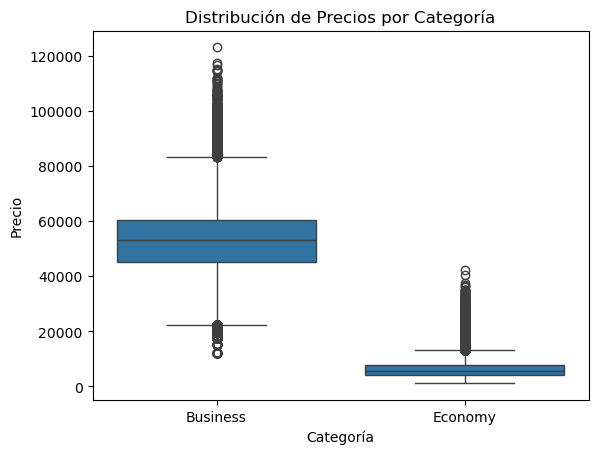

In [103]:
# Crear un boxplot para visualizar la distribución de precios por categoría
sns.boxplot(x='category', y='price', data=flights_df)
plt.title('Distribución de Precios por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.show()

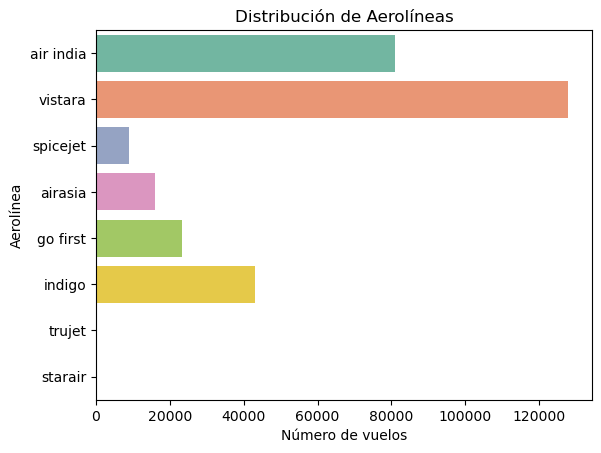

In [104]:
# Distribución de Aerolíneas
sns.countplot(y='airline', data=flights_df, hue='airline', palette='Set2', legend=False)
plt.title('Distribución de Aerolíneas')
plt.xlabel('Número de vuelos')
plt.ylabel('Aerolínea')
plt.show()

/var/folders/xt/tnx95b9j4qgfg2wfm4b1n9w40000gn/T/ipykernel_6775/1305795444.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  flights_df['price'].resample('M').mean().plot()


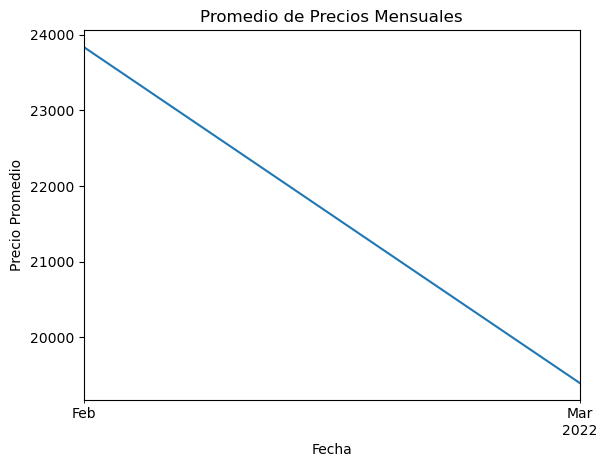

In [109]:
#analisis de precios en el tiempo
flights_df.set_index('date', inplace=True)
flights_df['price'].resample('M').mean().plot()
plt.title('Promedio de Precios Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.show()

In [123]:
#listar el nuevo Dataframe
display(flights_df)

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,category
date,,,,,,,,,,,
2022-02-11,air india,ai,868,1800,delhi,02h 00m,nonstop,2000,mumbai,25612.0,Business
2022-02-11,air india,ai,624,1900,delhi,02h 15m,nonstop,2115,mumbai,25612.0,Business
2022-02-11,air india,ai,531,2000,delhi,24h 45m,1stop,2045,mumbai,42220.0,Business
2022-02-11,air india,ai,839,2125,delhi,26h 30m,1stop,2355,mumbai,44450.0,Business
2022-02-11,air india,ai,544,1715,delhi,06h 40m,1stop,2355,mumbai,46690.0,Business
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,vistara,uk,832,0705,chennai,13h 50m,1stop,2055,hyderabad,7697.0,Economy
2022-03-31,vistara,uk,832,0705,chennai,13h 50m,1stop,2055,hyderabad,7709.0,Economy
2022-03-31,vistara,uk,826,1230,chennai,20h 35m,1stop,0905,hyderabad,8640.0,Economy
